$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 4 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [13]:
train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

<ipython-input-13-a90dbfea861f>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [ ]:
train.shape

(100000, 28)

In [ ]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

there are null values in columns['Name',' Monthly_Inhand_Salary','Type_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries'
                                 ,'Credit_History_Age','Amount_invested_monthly','Monthly_Balance']

In [ ]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


we must do scaling between these features

In [ ]:
train['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

'Credit_Score' is imbalanced , we need to use parameter class_weight='balanced'

In [ ]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

'Name' has 9985 null values ,but this column don't effect in output so we will drop it    
'Monthly_Inhand_Salary'  has 15002 null values , but 'Annual_Income' has the same information so we will drop it     
'Type_of_Loan'  has 11408 null values ,but this column don't effect in output so we will drop it    
'Num_of_Delayed_Payment' has 7002 null values  so, we will fill them by using 'mean'     
'Num_Credit_Inquiries' has 1965 null values  so, we will fill them by using 'mean'   
'Credit_History_Age' has 9030 null values  so, we will fill them by using 'mean'       
'Amount_invested_monthly' has 4479 null values  so, we will fill them by using 'mean'      
'Monthly_Balance' has 1200 null values  so, we will fill them by using 'mean'

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

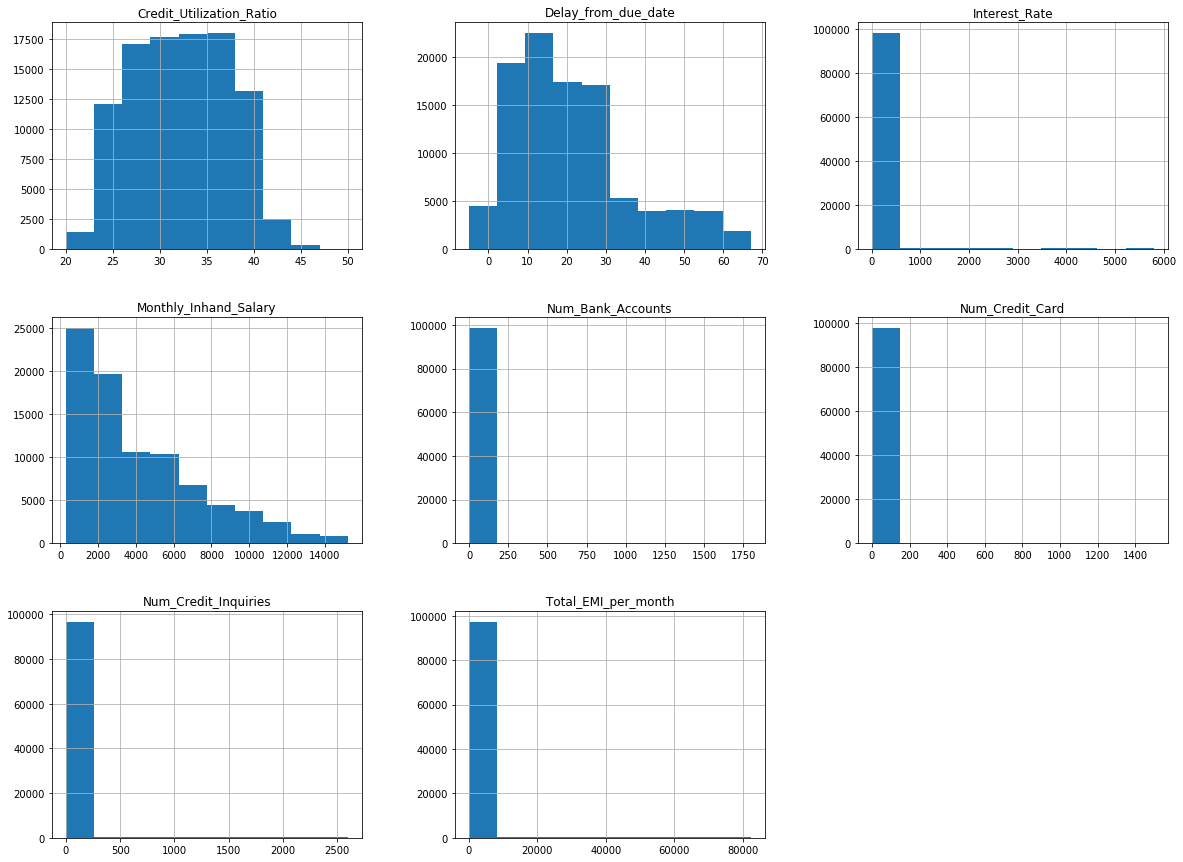

In [ ]:
train.hist(figsize=(20,15));

'Credit_Utilization_Ratio' and 'Delay_from_due_date' have gaussian distribution  
'Monthly_Inhand_Salary' has right skewness distribution   
the rest of graph have small range between 0 to 500 almost
so we need to do rescaling

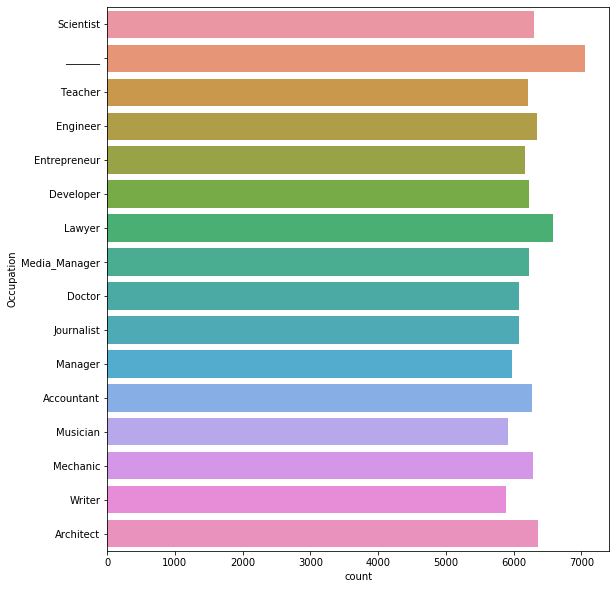

In [ ]:
plt.figure(figsize=(9,10))
sns.countplot(y="Occupation",data=train);

There are approximately 7,000 classes that do not contain a Occupation  so we will drop them    
most customers are 'Lawyers' and 'Architect'

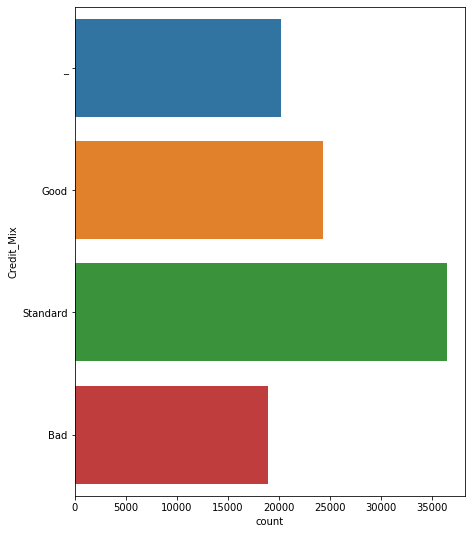

In [ ]:
plt.figure(figsize=(7,9))
sns.countplot(y="Credit_Mix",data=train);

most Credit_Mix is Standard  
we need to drop '_' from this column

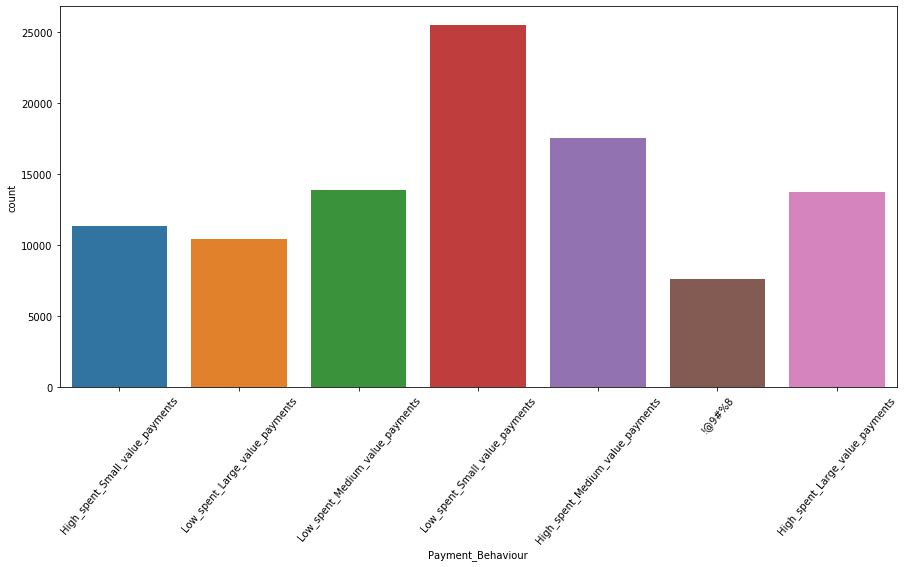

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x="Payment_Behaviour",data=train)
plt.xticks(rotation=50);

most Payment_Behaviour is Low_spent_Small_value_payments    
we need to replace "!@9#%8"to NAN

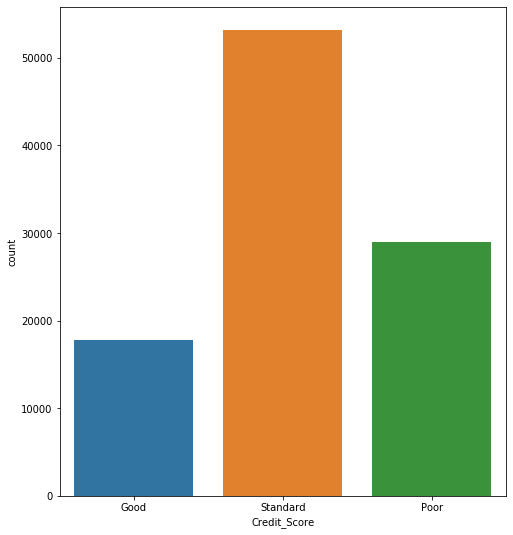

In [ ]:
plt.figure(figsize=(8,9))
sns.countplot(x="Credit_Score",data=train);

most credit_score is Standard    
this column imbalance

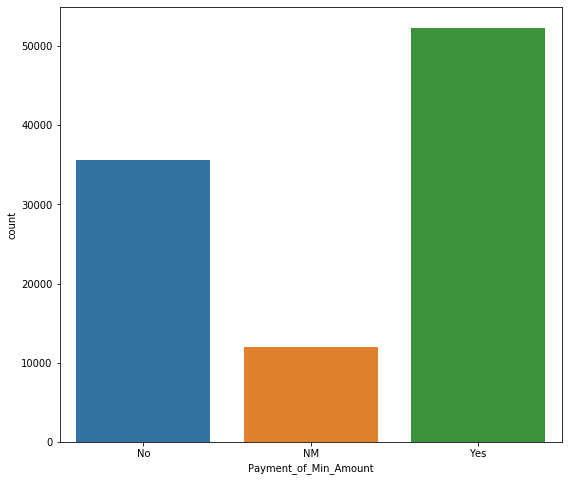

In [ ]:
plt.figure(figsize=(9,8))
sns.countplot(x="Payment_of_Min_Amount",data=train);

most Payment_of_Min_Amount is Yes

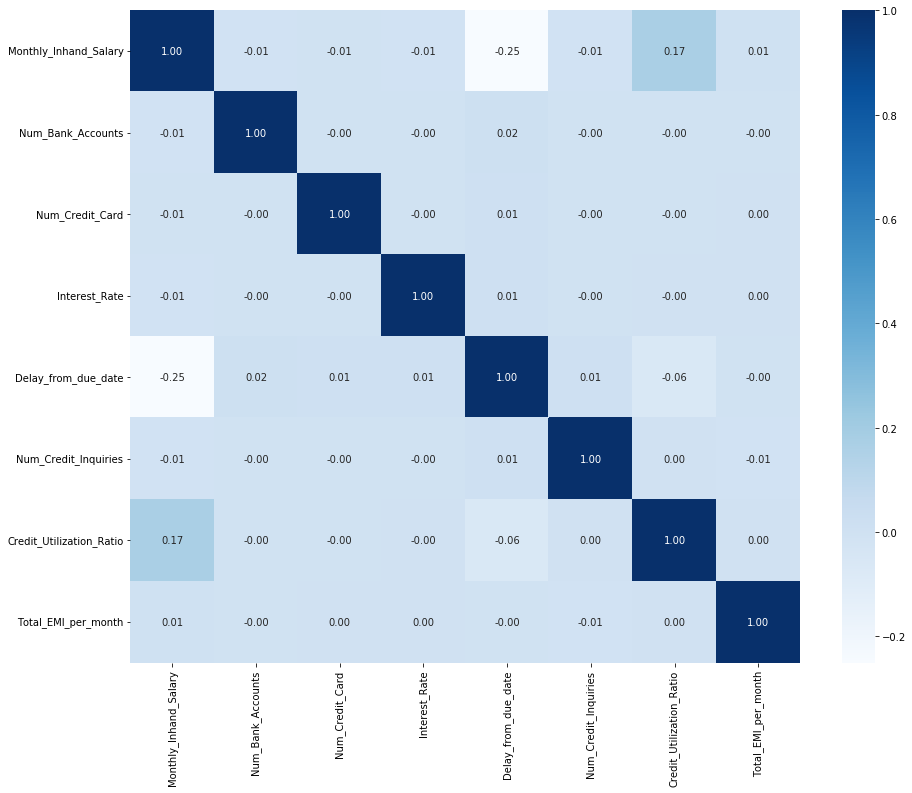

In [ ]:
df_corr=train.select_dtypes(include=["float64","int64"]).corr()
plt.figure(figsize=(15,12))
sns.heatmap(df_corr,annot=True,cmap="Blues",fmt=".2f");

there are no correlation between these features

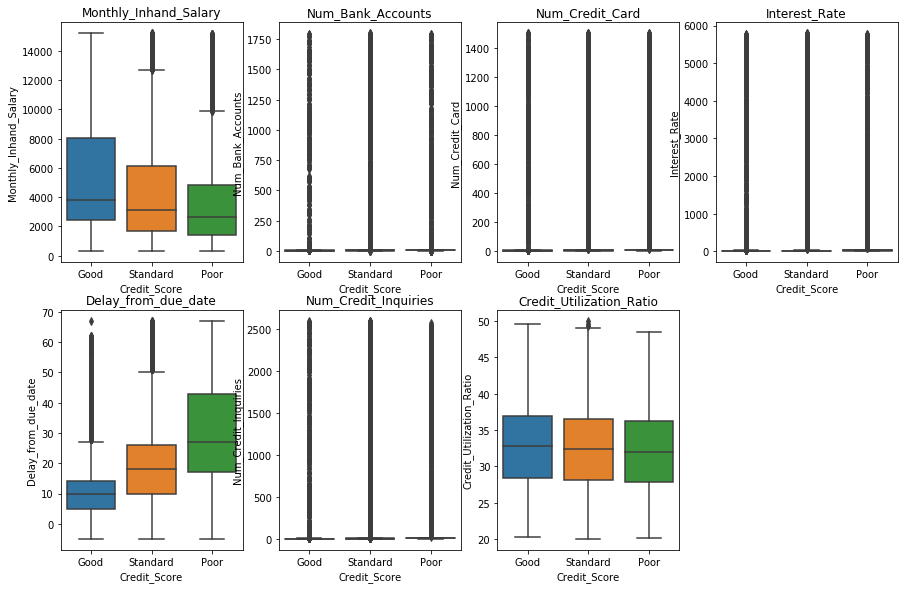

In [ ]:
df_numeric=train.select_dtypes(include=["float64","int64"])
plt.figure(figsize=(15,15))
for ax, col in enumerate(df_numeric.columns[:-1]):
    plt.subplot(3,4, ax+1)
    plt.title(col)
    sns.boxplot(x="Credit_Score", y=col, data=train)


there are outliers

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

Hints:
- It could be helpful to check `sklearn.preprocessing` module.
- Remember that Support Vector Machine classifiers require special preprocessing.

In [ ]:
train.drop(["ID","Customer_ID","Name","SSN","Monthly_Inhand_Salary","Type_of_Loan","Month"], axis=1, inplace=True)

In [ ]:
train['Credit_History_Age'] = train['Credit_History_Age'].str.extract(r'(\d+)')

In [ ]:
train["Credit_History_Age"] = pd.to_numeric(train["Credit_History_Age"], errors="coerce")

In [ ]:
train["Credit_History_Age"] = train["Credit_History_Age"].values.reshape(-1, 1)

In [ ]:
numeric_imputer = SimpleImputer(strategy='mean')
train["Credit_History_Age"] = numeric_imputer.fit_transform(train[["Credit_History_Age"]])

In [ ]:
train['Credit_History_Age']

0        22.000000
1        17.966516
2        22.000000
3        22.000000
4        22.000000
           ...    
99995    31.000000
99996    31.000000
99997    31.000000
99998    31.000000
99999    31.000000
Name: Credit_History_Age, Length: 100000, dtype: float64

In [ ]:
train.drop(train[train["Occupation"]=='_______'].index,inplace=True)

In [ ]:
label_encoder = LabelEncoder()
train['Occupation'] = label_encoder.fit_transform(train['Occupation'])

In [ ]:
train.drop(train[train["Credit_Mix"]=='_'].index,inplace=True)

In [ ]:
train["Credit_Mix"] = label_encoder.fit_transform(train["Credit_Mix"])

In [ ]:
train.drop(train[train["Payment_Behaviour"]=="!@9#%8"].index,inplace=True)

In [ ]:
train["Payment_Behaviour"] = label_encoder.fit_transform(train["Payment_Behaviour"])

In [ ]:
train["Credit_Score"] = label_encoder.fit_transform(train["Credit_Score"])

In [ ]:
train["Payment_of_Min_Amount"] = label_encoder.fit_transform(train["Payment_of_Min_Amount"])

In [ ]:
train.dropna(subset=["Payment_Behaviour"], inplace=True)

In [ ]:
train["Monthly_Balance"] = pd.to_numeric(train["Monthly_Balance"], errors="coerce")

In [ ]:
train["Monthly_Balance"] = train["Monthly_Balance"].values.reshape(-1, 1)

In [ ]:
train["Monthly_Balance"] = numeric_imputer.fit_transform(train[["Monthly_Balance"]])

In [ ]:
train["Amount_invested_monthly"] = pd.to_numeric(train["Amount_invested_monthly"], errors="coerce")
train["Amount_invested_monthly"] = train["Amount_invested_monthly"].values.reshape(-1, 1)
train["Amount_invested_monthly"] = numeric_imputer.fit_transform(train[["Amount_invested_monthly"]])

In [ ]:
train["Num_Credit_Inquiries"] = numeric_imputer.fit_transform(train[["Num_Credit_Inquiries"]])

In [ ]:
train["Num_of_Delayed_Payment"] = pd.to_numeric(train["Num_of_Delayed_Payment"], errors="coerce")
train["Num_of_Delayed_Payment"] = train["Num_of_Delayed_Payment"].values.reshape(-1, 1)
train["Num_of_Delayed_Payment"] = numeric_imputer.fit_transform(train[["Num_of_Delayed_Payment"]])

In [ ]:
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].replace('_',np.nan)

In [ ]:
train['Changed_Credit_Limit'] = pd.to_numeric(train['Changed_Credit_Limit'], errors="coerce")
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].values.reshape(-1, 1)
train['Changed_Credit_Limit'] = numeric_imputer.fit_transform(train[['Changed_Credit_Limit']])

In [ ]:
train['Age']=train['Age'].replace('-500',np.nan)

In [ ]:
train['Age'] = pd.to_numeric(train['Age'], errors="coerce")
train['Age'] = train['Age'].values.reshape(-1, 1)
train['Age'] = numeric_imputer.fit_transform(train[['Age']])

In [ ]:
train["Annual_Income"] = pd.to_numeric(train["Annual_Income"], errors="coerce")
train["Annual_Income"] = train["Annual_Income"].values.reshape(-1, 1)
train["Annual_Income"] = numeric_imputer.fit_transform(train[["Annual_Income"]])

In [ ]:
train["Num_of_Loan"] = pd.to_numeric(train["Num_of_Loan"], errors="coerce")
train["Num_of_Loan"] = train["Num_of_Loan"].values.reshape(-1, 1)
train["Num_of_Loan"] = numeric_imputer.fit_transform(train[["Num_of_Loan"]])

In [ ]:
train['Outstanding_Debt'] = pd.to_numeric(train['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

In [ ]:
train['Delay_from_due_date'] = train['Delay_from_due_date'].abs()

In [ ]:
columns_to_scale = ['Age', 'Annual_Income', 'Outstanding_Debt','Credit_Utilization_Ratio',
                    'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
scaler = StandardScaler()
train[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [ ]:
train.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:
X=train.drop("Credit_Score",axis=1)
y=train["Credit_Score"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.2, shuffle=True, stratify=y, random_state=1234)


## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [ ]:
test.drop(["ID","Customer_ID","Name","SSN","Monthly_Inhand_Salary","Type_of_Loan","Month"], axis=1, inplace=True)

In [ ]:
test['Credit_History_Age'] = test['Credit_History_Age'].str.extract(r'(\d+)')

In [ ]:
test["Credit_History_Age"] = pd.to_numeric(test["Credit_History_Age"], errors="coerce")

In [ ]:
test["Credit_History_Age"] = test["Credit_History_Age"].values.reshape(-1, 1)

In [ ]:
test["Credit_History_Age"] = numeric_imputer.transform(test[["Credit_History_Age"]])

In [ ]:
test.drop(test[test["Occupation"]=='_______'].index,inplace=True)

In [ ]:
test['Occupation'] = label_encoder.transform(test['Occupation'])

In [ ]:
test.drop(test[test["Credit_Mix"]=='_'].index,inplace=True)

In [ ]:
test["Credit_Mix"] = label_encoder.transform(test["Credit_Mix"])

In [ ]:
test.drop(test[test["Payment_Behaviour"]=="!@9#%8"].index,inplace=True)

In [ ]:
test["Payment_Behaviour"] = label_encoder.transform(test["Payment_Behaviour"])

In [ ]:
test["Payment_of_Min_Amount"] = label_encoder.transform(test["Payment_of_Min_Amount"])

In [ ]:
test.dropna(subset=["Payment_Behaviour"], inplace=True)

In [ ]:
test["Monthly_Balance"] = pd.to_numeric(test["Monthly_Balance"], errors="coerce")

In [ ]:
test["Monthly_Balance"] = test["Monthly_Balance"].values.reshape(-1, 1)

In [ ]:
test["Monthly_Balance"] = numeric_imputer.transform(test[["Monthly_Balance"]])

In [ ]:
test["Amount_invested_monthly"] = pd.to_numeric(test["Amount_invested_monthly"], errors="coerce")
test["Amount_invested_monthly"] = test["Amount_invested_monthly"].values.reshape(-1, 1)
test["Amount_invested_monthly"] = numeric_imputer.transform(test[["Amount_invested_monthly"]])

In [ ]:
test["Num_Credit_Inquiries"] = numeric_imputer.transform(test[["Num_Credit_Inquiries"]])

In [ ]:
test["Num_of_Delayed_Payment"] = pd.to_numeric(test["Num_of_Delayed_Payment"], errors="coerce")
test["Num_of_Delayed_Payment"] = test["Num_of_Delayed_Payment"].values.reshape(-1, 1)
test["Num_of_Delayed_Payment"] = numeric_imputer.transform(test[["Num_of_Delayed_Payment"]])

In [ ]:
test['Changed_Credit_Limit'] = test['Changed_Credit_Limit'].replace('_',np.nan)

In [ ]:
test['Changed_Credit_Limit'] = pd.to_numeric(test['Changed_Credit_Limit'], errors="coerce")
test['Changed_Credit_Limit'] = test['Changed_Credit_Limit'].values.reshape(-1, 1)
test['Changed_Credit_Limit'] = numeric_imputer.transform(test[['Changed_Credit_Limit']])

In [ ]:
test['Age']=test['Age'].replace('-500',np.nan)

In [ ]:
test['Age'] = pd.to_numeric(test['Age'], errors="coerce")
test['Age'] = test['Age'].values.reshape(-1, 1)
test['Age'] = numeric_imputer.transform(test[['Age']])

In [ ]:
test["Annual_Income"] = pd.to_numeric(test["Annual_Income"], errors="coerce")
test["Annual_Income"] = test["Annual_Income"].values.reshape(-1, 1)
test["Annual_Income"] = numeric_imputer.transform(test[["Annual_Income"]])

In [ ]:
test["Num_of_Loan"] = pd.to_numeric(test["Num_of_Loan"], errors="coerce")
test["Num_of_Loan"] = test["Num_of_Loan"].values.reshape(-1, 1)
test["Num_of_Loan"] = numeric_imputer.transform(test[["Num_of_Loan"]])

In [ ]:
test['Outstanding_Debt'] = pd.to_numeric(test['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

In [ ]:
test['Delay_from_due_date'] = test['Delay_from_due_date'].abs()

In [ ]:
test[columns_to_scale] = scaler.transform(test[columns_to_scale])

In [ ]:
test.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

----------------------

# `05` Linear Support Vector Machine Classifier

Using `sklearn` implementation of linear support vector machine classifiers to model the data.

Hint: Look for `sklearn.svm.LinearSVC` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$

In [ ]:
svm_classifier = LinearSVC(random_state=1234)

In [ ]:
svm_classifier.fit(X_train, y_train)

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(random_state=1234)

In [ ]:
predictions = svm_classifier.predict(X_train)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

Which metric is more reliable?

In [ ]:
def classification_metrics(y_test, predictions):

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)


    precision = precision_score(y_test, predictions, average='weighted')
    print("Precision:", precision)


    recall = recall_score(y_test, predictions, average='weighted')
    print("Recall:", recall)


    f1 = f1_score(y_test, predictions, average='weighted')
    print("F1 Score:", f1)


    conf_matrix = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:")
    print(conf_matrix)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")



Accuracy: 0.5999415973134764
Precision: 0.6292810783798249
Recall: 0.5999415973134764
F1 Score: 0.6036147656486214
Confusion Matrix:
[[ 788  179  251]
 [ 196 1310  480]
 [ 569 1065 2011]]


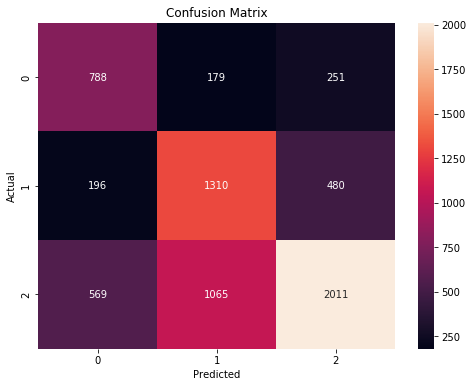

In [ ]:
classification_metrics(y_train, predictions)

F1_score and confusion matrix are more reliable

----------------------

# `06` Kernelized Support Vector Machine Classifier

Using `sklearn` implementation of kernelized support vector machine classifiers to model the data.

Hint: Look for `sklearn.svm.SVC` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$
- `kernel` = 'linear'

In [ ]:
svc_linear = SVC(kernel='linear', random_state=1234)

In [ ]:
svc_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=1234)

In [ ]:
predictions = svc_linear.predict(X_train)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

`Q` Which metric is more reliable?
`Q` Compare the results to those of `sklearn.svm.LinearSVC` class. Also, is there a difference in the training time?

Accuracy: 0.6203825375967295
Precision: 0.6265264319072129
Recall: 0.6203825375967295
F1 Score: 0.6191582732252084
Confusion Matrix:
[[ 819   21  378]
 [ 215  960  811]
 [ 587  588 2470]]


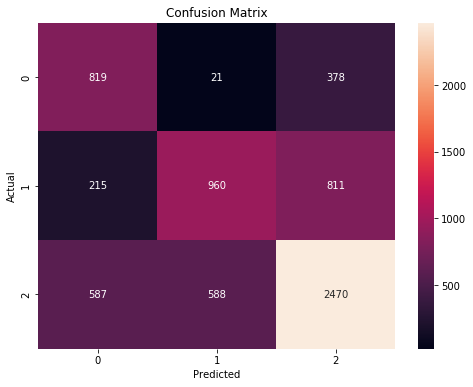

In [ ]:
classification_metrics(y_train, predictions)

F1_score and confusion matrix are more reliable   
 there is a difference in the training time , SVC(kernel='linear') takes very much time and the result between this and LinearSVC the same.   
Therefore it is preferable to use LinearSVC

## `iii` Kernelization Mode: On

Let's try the both `poly` and `rbf` kernels. Use default $C, \gamma, \space and/or \space degree$ parameter(s) for simplicity if you want. Does kernelization make the model better?

Which of the two kernels performs better?

In [ ]:
svm_poly = SVC(kernel='poly', random_state=1234)

In [ ]:
svm_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=1234)

In [ ]:
predictions_poly = svm_poly.predict(X_train)

Accuracy: 0.5314644473645788
Precision: 0.4657750440943502
Recall: 0.5314644473645788
F1 Score: 0.37373049357928884
Confusion Matrix:
[[   7    2 1209]
 [   5    9 1972]
 [  12    9 3624]]


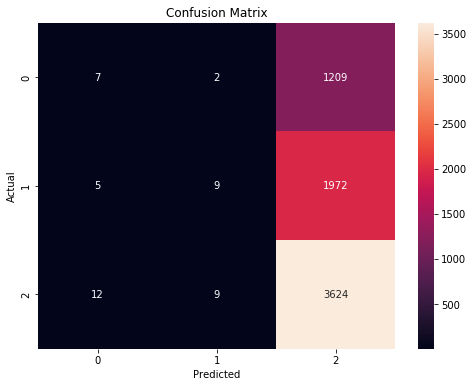

In [ ]:
classification_metrics(y_train, predictions_poly)

In [ ]:
svm_rbf = SVC(kernel='rbf', random_state=1234)

In [ ]:
svm_rbf.fit(X_train, y_train)

SVC(random_state=1234)

In [ ]:
predictions_rbf = svm_rbf.predict(X_train)

Accuracy: 0.583588845086874
Precision: 0.5017654680387058
Recall: 0.583588845086874
F1 Score: 0.4995775503926703
Confusion Matrix:
[[   0   10 1208]
 [   0  624 1362]
 [   0  272 3373]]


C:\Users\Dina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


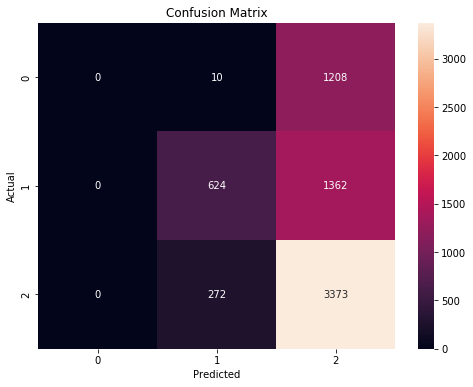

In [ ]:
classification_metrics(y_train, predictions_rbf)

in this data , kernelization doesn't make the model better    
rbf kernel performs better than poly kernel

## `iv` Tuning Hyperparameters

Try different  $C, \gamma, \space and/or \space degree$ values and evaluate. What is the best hyperparamters value combination?

Remember that $alpha=\frac{1}{C}$ which means less regularization for higher $C$ values.

`Hint:` Make sure to tune only relevant hyperparameters per kernel (e.g., don't tune different values for `degree` while using `rbf` kernel)

`Note:` You can tune other parameters as you see fit (but make sure you elaborate your reasoning.

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [ ]:
param_dist_poly = {
    'C': [0.01,0.1,1],
    'degree': [2,3,4,5],
    'coef0': [0, 1,100],
}
svm_poly = SVC(kernel='poly', random_state=1234)

random_search_poly = RandomizedSearchCV(svm_poly, param_distributions=param_dist_poly, n_iter=2, cv=3, random_state=1234)
random_search_poly.fit(X_train, y_train)

best_params_poly = random_search_poly.best_params_
print("Best Hyperparameters for Polynomial Kernel:", best_params_poly)


Best Hyperparameters for Polynomial Kernel: {'degree': 5, 'coef0': 100, 'C': 1}


In [ ]:
best_svm_poly = random_search_poly.best_estimator_
predictions_poly = best_svm_poly.predict(X_train)

Accuracy: 0.621888004672556
Precision: 0.6210584315146929
Recall: 0.621888004672556
F1 Score: 0.615229208568562
Confusion Matrix:
[[1285   43 1109]
 [ 283 1805 1883]
 [ 866  995 5428]]


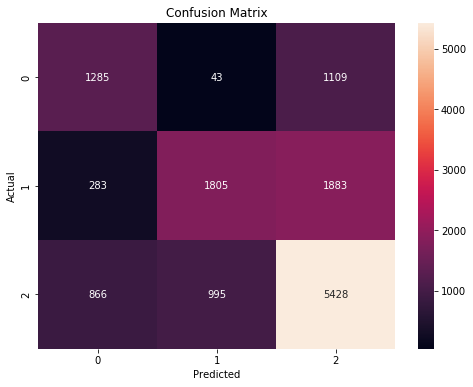

In [ ]:
classification_metrics(y_train, predictions_poly)

In [ ]:
param_dist_rbf = {
    'C':[0.01,0.1,1,10],
    'gamma': [0.01, 0.1, 1,10],
}
svm_rbf = SVC(kernel='rbf', random_state=1234)


random_search_rbf = RandomizedSearchCV(svm_rbf, param_distributions=param_dist_rbf, n_iter=10, cv=3, random_state=1234)
random_search_rbf.fit(X_train, y_train)


best_params_rbf = random_search_rbf.best_params_
print("Best Hyperparameters for RBF Kernel:", best_params_rbf)


Best Hyperparameters for RBF Kernel: {'gamma': 0.01, 'C': 10}


In [ ]:
best_svm_rbf = random_search_rbf.best_estimator_
predictions_rbf = best_svm_rbf.predict(X_train)

Accuracy: 0.9244360078849383
Precision: 0.92586462938149
Recall: 0.9244360078849383
F1 Score: 0.9247876572839349
Confusion Matrix:
[[2204    8  225]
 [ 104 3611  256]
 [ 295  147 6847]]


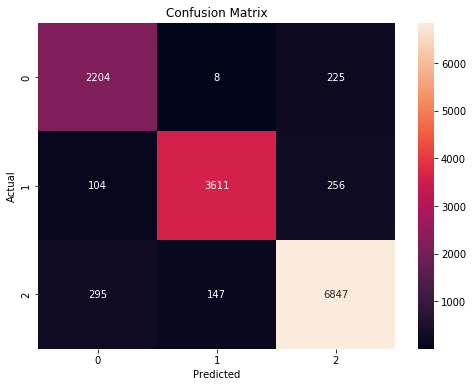

In [ ]:
classification_metrics(y_train, predictions_rbf)

the Best model is RBF Kernel and the Best Hyperparameters for RBF Kernel: {'gamma': 0.01, 'C': 10}

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [ ]:
y_pred_test =  best_svm_rbf.predict(X_test)

Accuracy: 0.6584902905533655
Precision: 0.6570683874452542
Recall: 0.6584902905533655
F1 Score: 0.6548513411135464
Confusion Matrix:
[[ 634   47  537]
 [ 126 1105  755]
 [ 396  478 2771]]


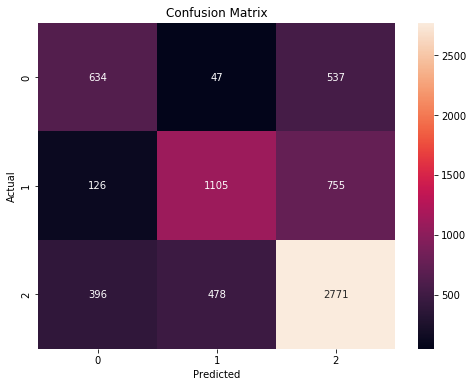

In [ ]:
classification_metrics(y_test, y_pred_test)

best_svm_rbf is made overfitting because c is large

In [ ]:
y_pred_test =random_search_poly.predict(X_test)

Accuracy: 0.6241787122207622
Precision: 0.6243087569258787
Recall: 0.6241787122207622
F1 Score: 0.6183338248720552
Confusion Matrix:
[[ 638   16  564]
 [ 150  928  908]
 [ 444  492 2709]]


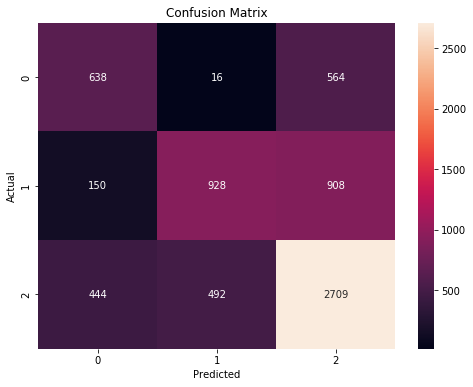

In [ ]:
classification_metrics(y_test, y_pred_test)

-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

In [14]:
train.drop(["ID","Customer_ID","Name","SSN","Monthly_Inhand_Salary","Type_of_Loan","Month"], axis=1, inplace=True)

In [15]:
class DataPreprocessing(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.__cols =['Credit_History_Age',"Occupation","Credit_Mix","Payment_Behaviour","Monthly_Balance",'Changed_Credit_Limit','Age','Outstanding_Debt','Delay_from_due_date']

    def fit(self, X, y=None):
        assert all(col in X.columns for col in self.__cols), f"The df dataframe must have {self.__cols} columns"
        return self

    def transform(self, X):

        X['Credit_History_Age'] = X['Credit_History_Age'].str.extract(r'(\d+)')
        X["Credit_History_Age"] = pd.to_numeric(X["Credit_History_Age"], errors="coerce")
        X["Credit_History_Age"] = X["Credit_History_Age"].values.reshape(-1, 1)


        X.drop(X[X["Occupation"] == '_______'].index, inplace=True)


        X.drop(X[X["Credit_Mix"] == '_'].index, inplace=True)


        X.drop(X[X["Payment_Behaviour"] == "!@9#%8"].index, inplace=True)


        X.dropna(subset=["Payment_Behaviour"], inplace=True)


        X["Monthly_Balance"] = pd.to_numeric(X["Monthly_Balance"], errors="coerce")
        X["Monthly_Balance"] = X["Monthly_Balance"].values.reshape(-1, 1)


        X['Changed_Credit_Limit'] = X['Changed_Credit_Limit'].replace('_', np.nan)
        X['Changed_Credit_Limit'] = pd.to_numeric(X['Changed_Credit_Limit'], errors="coerce")
        X['Changed_Credit_Limit'] = X['Changed_Credit_Limit'].values.reshape(-1, 1)


        X['Age'] = X['Age'].replace('-500', np.nan)
        X['Age'] = pd.to_numeric(X['Age'], errors="coerce")
        X['Age'] = X['Age'].values.reshape(-1, 1)


        X['Outstanding_Debt'] = pd.to_numeric(X['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
        X['Delay_from_due_date'] = X['Delay_from_due_date'].abs()


        return X

In [16]:

num_cols = train.drop(columns=["Credit_Score"]).select_dtypes('number').columns
cat_cols = train.drop(columns=["Credit_Score"]).select_dtypes('object').columns


In [36]:
num_pipeline = Pipeline(
    [
        ('n_nulls', SimpleImputer(strategy='mean')),
        ('DataPreprocessing',DataPreprocessing())
    ]
)

cat_pipeline = Pipeline(
    [
        ('label_encoder', LabelEncoder())
    ]
)

col_transformer = ColumnTransformer(
    [
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)

full_pipeline = Pipeline(
    [
        ('preprocessing', col_transformer),
        ('scaler', RobustScaler()),
        ('model',SVC(kernel='poly', random_state=1234,degree= 5, coef0= 100, C= 1) )
    ]
)

In [37]:
X=train.drop("Credit_Score",axis=1)
y=train["Credit_Score"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.2, shuffle=True, stratify=y, random_state=1234)

In [39]:
full_pipeline.fit(X_train, y_train)

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [33]:
predictions_train = full_pipeline.predict(X_train)

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [ ]:
classification_metrics(y_train, predictions_train)

In [ ]:
predictions_test = full_pipeline.predict(X_test)

In [ ]:
classification_metrics(y_test, predictions_test)

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$